In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load the TSV file
df = pd.read_csv('ml-32m/ratings.csv')


# Print the head of the DataFrame
print(df.head())

/Users/alexanderaujesky/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40


In [2]:
data_folder = './MovieSummaries/MovieSummaries/'
#paths to files
plot_summaries_path = data_folder + 'plot_summaries.txt'
movie_metadata_path = data_folder + 'movie.metadata.tsv'
character_metadata_path = data_folder + 'character.metadata.tsv'

# load the data
# 1. Plot summaries data
plot_summaries_df = pd.read_csv(plot_summaries_path, delimiter='\t', names=['wikipedia_movie_id', 'plot_summary'], 
                                 encoding='utf-8')

# 2. Movie metadata
movie_metadata_df = pd.read_csv(movie_metadata_path, delimiter='\t', names=['wikipedia_movie_id', 'freebase_movie_id', 
                                                                            'movie_name', 'release_date', 'box_office_revenue',
                                                                            'runtime', 'languages', 'countries', 'genres'], 
                                 encoding='utf-8')

# 3. Character metadata
character_metadata_df = pd.read_csv(character_metadata_path, delimiter='\t', names=['wikipedia_movie_id', 'freebase_movie_id', 'release_date', 'character_name', 
                                                                                    'actor_dob', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 
                                                                                    'actor_age_at_release', 'freebase_character_actor_map_id', 'freebase_character_id', 
                                                                                    'freebase_actor_id'], 
                                     encoding='utf-8')


In [3]:
movies = pd.read_csv('ml-32m/movies.csv')

In [4]:
movie_metadata_df['movie_name_formatted'] = movie_metadata_df['movie_name'].str.lower().str.strip()
movies['title_format'] = movies['title'].str[:-6].str.strip().str.lower()


In [5]:
movies.head()

,movieId,title,genres,title_format
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,toy story
1,2,Jumanji (1995),Adventure|Children|Fantasy,jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,grumpier old men
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,waiting to exhale
4,5,Father of the Bride Part II (1995),Comedy,father of the bride part ii


In [6]:
# calculate the number of common movies between the two datasets

common_movies = set(movie_metadata_df['movie_name_formatted']).intersection(set(movies['title_format']))
print('Number of common movies:', len(common_movies))

# merge the two datasets

merged_df = pd.merge(movies, movie_metadata_df, left_on='title_format', right_on='movie_name_formatted', how='inner')

Number of common movies: 12318


In [7]:
merged_df

,movieId,title,genres_x,title_format,wikipedia_movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres_y,movie_name_formatted
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,toy story,53085,/m/0dyb1,Toy Story,1995-11-19,361958736.0,77.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0556j8"": ""Buddy film"", ""/m/03k9fj"": ""Adve...",toy story
1,2,Jumanji (1995),Adventure|Children|Fantasy,jumanji,3700174,/m/09w353,Jumanji,1995-12-15,262797249.0,104.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0hj3n2k"": ""Fanta...",jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,grumpier old men,1934035,/m/0676dr,Grumpier Old Men,1995-12-22,71518503.0,101.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0556j8"": ""...",grumpier old men
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,waiting to exhale,972970,/m/03vny7,Waiting to Exhale,1995-12-22,81452156.0,121.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3n0w"": ""Ensemble Film"", ""/m/06w2n3t"": ...",waiting to exhale
4,5,Father of the Bride Part II (1995),Comedy,father of the bride part ii,3303622,/m/094g2z,Father of the Bride Part II,1995-12-08,76594107.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06qm3"": ""Screwball comedy"", ""/m/02l7c8"": ...",father of the bride part ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,131152,The Fat Spy (1966),Comedy,the fat spy,1853200,/m/0613sx,The Fat Spy,1966,NaN,75.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0gf28"": ""Parody"", ""/m/0220p9g"": ""Musical ...",the fat spy
17558,131166,WWII IN HD (2009),(no genres listed),wwii in hd,26321497,/m/0bbxzy2,WWII in HD,NaN,NaN,NaN,{},{},"{""/m/082gq"": ""War film""}",wwii in hd
17559,131239,Three Quarter Moon (2011),Comedy|Drama,three quarter moon,33597212,/m/0hgrd5g,Three Quarter Moon,2011-09-30,NaN,95.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/0gtg"": ...","{""/m/0345h"": ""Germany""}","{""/m/0556j8"": ""Buddy film"", ""/m/0hqxf"": ""Famil...",three quarter moon
17560,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,brother bear 2,4118248,/m/0bk2k2,Brother Bear 2,2006-08-29,NaN,73.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/0hcr"": ""Animat...",brother bear 2


In [8]:
# Remove this user from the dataset, because it has too many ratings
df = df[df['userId'] != 175325]

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

def plot_user_genre_ratings(user_id, ratings_df, movies_genres_df):
    """
    Create histogram subplots of user ratings by genre.
    
    Parameters:
    -----------
    user_id : int
        The ID of the user to analyze
    ratings_df : pandas.DataFrame
        DataFrame containing columns: user_id, movie_id, rating
    movies_genres_df : pandas.DataFrame
        DataFrame containing columns: movie_id, genres (pipe-separated string)
    """
    # Filter ratings for the specific user
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    
    # Merge with movies_genres to get genre information
    user_ratings_with_genres = user_ratings.merge(movies_genres_df, on='movieId')
    
    # Split the genres and explode to create separate rows for each genre
    user_ratings_with_genres['genres'] = user_ratings_with_genres['genres'].str.split('|')
    user_ratings_with_genres = user_ratings_with_genres.explode('genres')
    
    # Get unique genres
    unique_genres = user_ratings_with_genres['genres'].unique()
    
    # Calculate number of subplots needed
    n_genres = len(unique_genres)
    n_cols = 3
    n_rows = (n_genres + n_cols - 1) // n_cols
    
    # Create figure and subplots
    fig = plt.figure(figsize=(15, 4 * n_rows))
    fig.suptitle(f'Rating Distribution by Genre for User {user_id}', fontsize=16, y=1.02)
    
    # Create a subplot for each genre
    for idx, genre in enumerate(unique_genres, 1):
        genre_ratings = user_ratings_with_genres[user_ratings_with_genres['genres'] == genre]['rating']
        
        plt.subplot(n_rows, n_cols, idx)
        # Create histogram with centered bars
        plt.hist(genre_ratings, bins=np.arange(0.25, 5.75, 0.5), align='mid', 
                rwidth=0.8, color='skyblue', edgecolor='black')
                
        plt.title(f'{genre}\n(n={len(genre_ratings)} ratings)')
        plt.xlabel('Rating')
        plt.ylabel('Count')
    
    plt.tight_layout()
    return fig

def plot_ratings_by_release_year(user_id, ratings_df, movies_df):
    """
    Plot the distribution of movie release years for each rating value given by a user.
    
    Parameters:
    -----------
    user_id : int
        The ID of the user to analyze
    ratings_df : pandas.DataFrame
        DataFrame containing columns: user_id, movie_id, rating
    movies_df : pandas.DataFrame
        DataFrame containing columns: movie_id, release_year
    """
    # Filter ratings for the specific user
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    
    # Merge with movies to get release year information
    user_ratings_with_year = user_ratings.merge(movies_df, on='movieId')
    
    # Get unique rating values
    unique_ratings = sorted(user_ratings_with_year['rating'].unique())
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Color map for different ratings
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_ratings)))
    
    # Plot a smoothed line for each rating
    for rating, color in zip(unique_ratings, colors):
        # Get release years for this rating
        years = pd.to_datetime(user_ratings_with_year[user_ratings_with_year['rating'] == rating]['release_date'], format='%Y-%m-%d', errors='coerce')
        # Get the year from the date
        years = years.dt.year.dropna()
        
        if len(years) > 1:  # Need at least 2 points for kde
            # Create kernel density estimate
            
            kernel = gaussian_kde(years)
            
            # Create year range for smooth plot
            year_range = np.linspace(years.min(), years.max(), 100)
            
            # Plot smoothed line
            density = kernel(year_range)
            # Scale density to make it more visible
            #density = density * len(years) * 2  # Scale factor can be adjusted
            
            plt.plot(year_range, density, label=f'Rating {rating:.1f} (n={len(years)})',
                    color=color, linewidth=2)
            
            # Add scatter plot of actual points
            plt.scatter(years, np.zeros_like(years), color=color, alpha=0.2,
                       marker='|', s=100)
    
    # Customize the plot
    plt.title(f'Distribution of Movie Release Years by Rating for User {user_id}')
    plt.xlabel('Release Year')
    plt.ylabel('Density')
    
    # Add legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    return plt.gcf()

# Alternative version using histogram instead of KDE
def plot_ratings_by_release_year_histogram(user_id, ratings_df, movies_df, bin_width=5):
    """
    Plot histogram of movie release years for each rating value given by a user.
    
    Parameters:
    -----------
    user_id : int
        The ID of the user to analyze
    ratings_df : pandas.DataFrame
        DataFrame containing columns: user_id, movie_id, rating
    movies_df : pandas.DataFrame
        DataFrame containing columns: movie_id, release_year
    bin_width : int
        Width of the histogram bins in years
    """
    # Filter ratings for the specific user
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    
    # Merge with movies to get release year information
    user_ratings_with_year = user_ratings.merge(movies_df, on='movieId')
    
    # Get unique rating values
    unique_ratings = sorted(user_ratings_with_year['rating'].unique())
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Calculate bin edges
    user_ratings_with_year['release_date'] = pd.to_datetime(user_ratings_with_year['release_date'], format='%Y-%m-%d', errors='coerce')
    
    min_year = user_ratings_with_year['release_date'].dt.year.min()
    max_year = user_ratings_with_year['release_date'].dt.year.max()

    bins = np.arange(min_year - (min_year % bin_width), 
                    max_year + bin_width - (max_year % bin_width) + 1, 
                    bin_width)
    
    # Color map for different ratings
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_ratings)))
    
    # Plot histograms for each rating
    for rating, color in zip(unique_ratings, colors):
        years = pd.to_datetime(user_ratings_with_year[user_ratings_with_year['rating'] == rating]['release_date'], format='%Y-%m-%d', errors='coerce')
        
        plt.hist(years, bins=bins, alpha=0.5, label=f'Rating {rating:.1f} (n={len(years)})',
                color=color, histtype='step', linewidth=2, density=True)
        
        # Add scatter plot of actual points
        plt.scatter(years, np.zeros_like(years), color=color, alpha=0.2,
                   marker='|', s=100)
    
    # Customize the plot
    plt.title(f'Distribution of Movie Release Years by Rating for User {user_id}')
    plt.xlabel('Release Year')
    plt.ylabel('Density')
    
    # Add legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    return plt.gcf()

In [10]:
# Print the user with the most ratings
user_ratings_count = df['userId'].value_counts()

print('User with the most ratings:')
print(user_ratings_count.head(20))


User with the most ratings:
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
74142     5447
34576     5356
131904    5330
83090     5169
59477     4988
130767    4785
79159     4707
8963      4524
15617     4354
92011     4236
71975     4182
20132     4101
46470     4094
88820     4093
63147     3958
Name: userId, dtype: int64


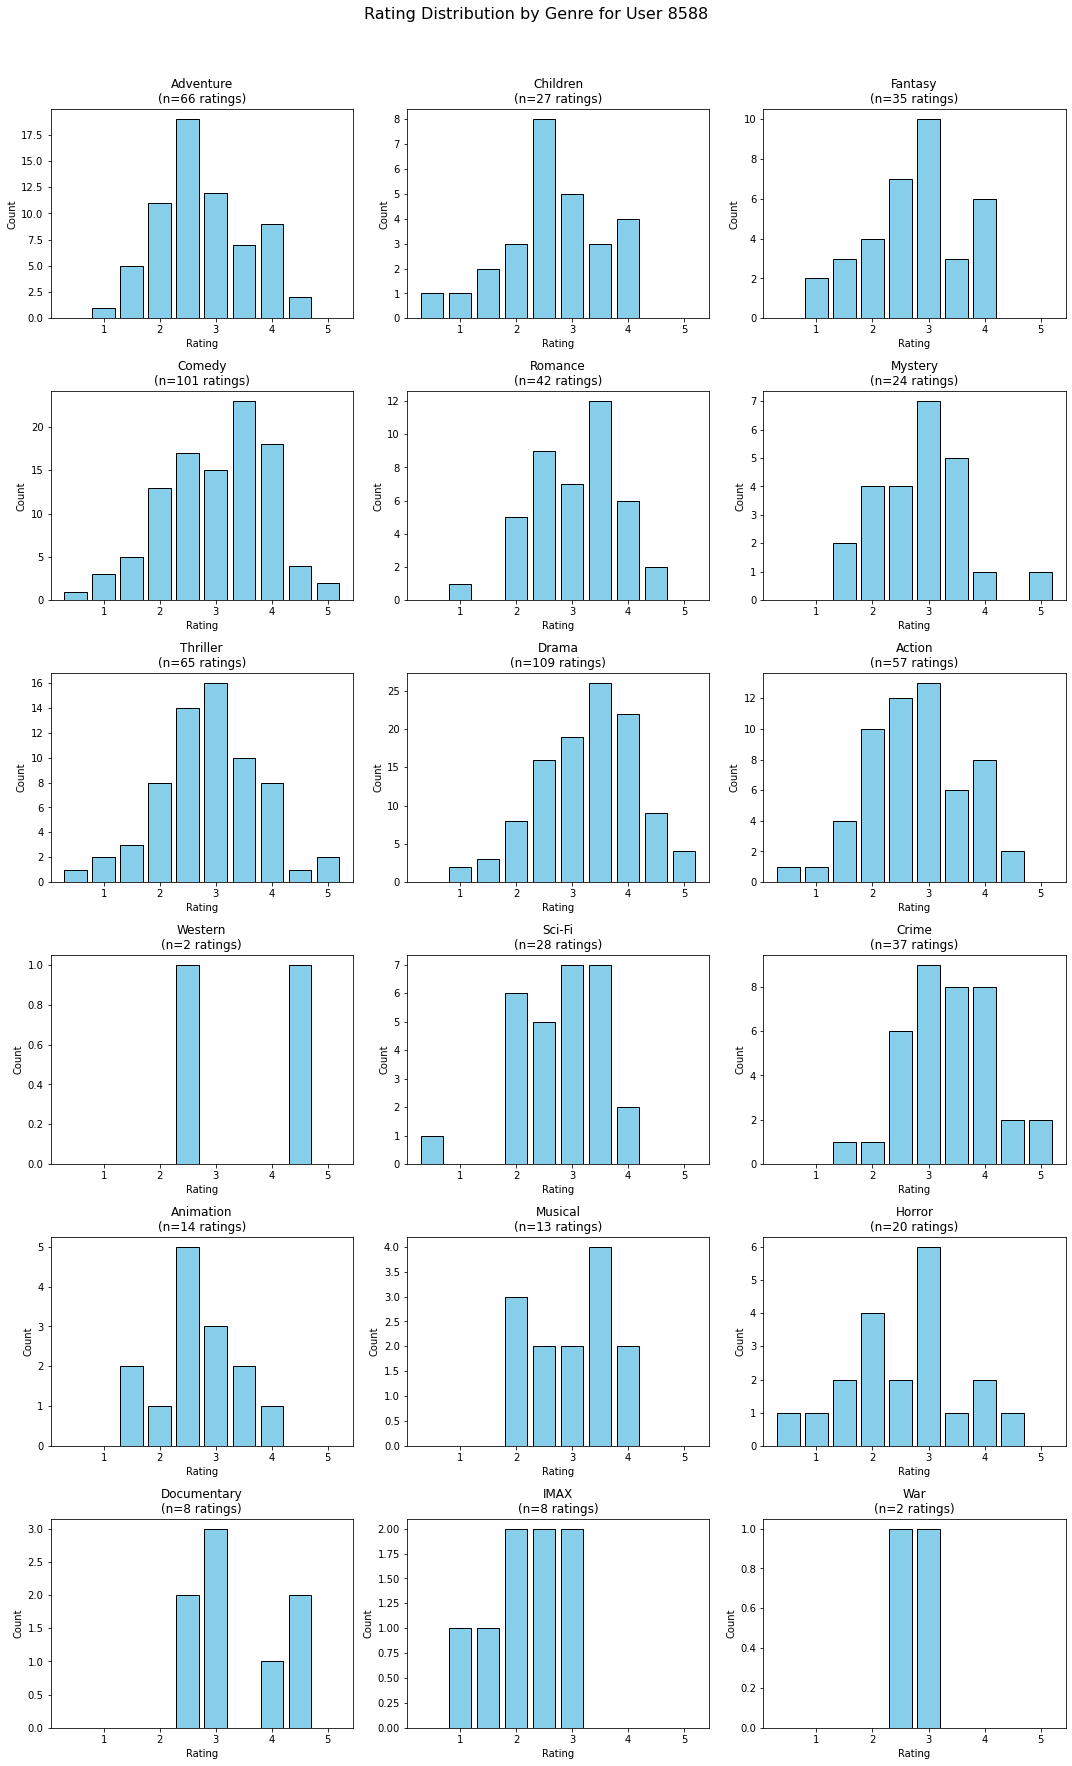

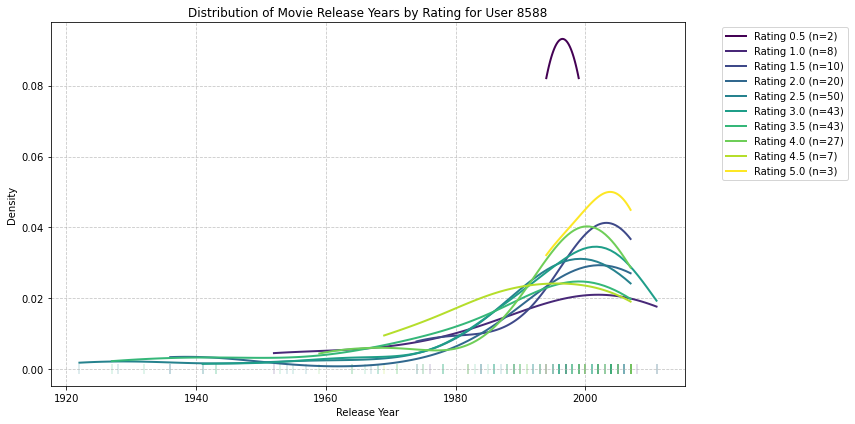

In [11]:
fig1 = plot_user_genre_ratings(8588, df, movies)
plt.show()

fig2 = plot_ratings_by_release_year(8588, df, merged_df)
plt.show()

In [12]:
# Filter users by minimum number of ratings to reduce matrix size
min_ratings = 1000  # adjust this as needed
user_counts = df['userId'].value_counts()
valid_users = user_counts[user_counts >= min_ratings].index

# Filter the dataframe to only include these users
filtered_df = df[df['userId'].isin(valid_users)]

# Create the sparse matrix using pivot_table instead of pivot
# pivot_table is generally more memory efficient
ratings_matrix = filtered_df.pivot_table(
    index='userId',
    columns='movieId',
    values='rating',
    fill_value=None  # or use 0 if you prefer
)

# Optional: you can convert to sparse if still too large
# from scipy.sparse import csr_matrix
# sparse_ratings = csr_matrix(ratings_matrix)

print(f"Matrix shape: {ratings_matrix.shape}")
print(f"\nPreview of ratings matrix:")
print(ratings_matrix.iloc[:5, :5])  # Show first 5 users and 5 movies

Matrix shape: (1894, 24881)

Preview of ratings matrix:
movieId    1    2    3    4    5
userId                          
116      3.0  2.0  2.0  NaN  NaN
156      5.0  5.0  2.0  3.0  3.0
208      4.0  NaN  NaN  NaN  NaN
298      4.0  3.0  3.0  NaN  3.0
359      5.0  NaN  NaN  NaN  NaN


In [13]:
a = (~ratings_matrix.isna()).sum(axis=1).sort_values(ascending=False)

In [14]:
n = 1000  # You can change this value to your desired threshold

# Group by userId and count the number of ratings for each user
user_rating_counts = df.groupby('userId').size()

# Filter users with more than n ratings
users_with_more_than_n_ratings = user_rating_counts[user_rating_counts > n]

# Print the number of users with more than n ratings
print(f"Number of users with more than {n} ratings: {len(users_with_more_than_n_ratings)}")

Number of users with more than 1000 ratings: 1884


In [15]:
# Filter the dataframe to include only users with more than n ratings
filtered_df = df[df['userId'].isin(users_with_more_than_n_ratings.index)]

# Create a user-item matrix
user_item_matrix = filtered_df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

In [16]:
#Standardize the matrix before pca

scaler = StandardScaler()
user_item_matrix_pca = scaler.fit_transform(user_item_matrix)


In [17]:



# Apply PCA
m = 2  # Number of principal components
pca = PCA(n_components=m)
pca_result = pca.fit_transform(user_item_matrix_pca)

# Get the components of the PCA
components = pca.components_


In [18]:

# Get the indices of the movies that have the highest absolute values in the first component
most_influential_movies_indices = components[0].argsort()[-10:][::-1]

# Get the movie IDs of the most influential movies
most_influential_movies = user_item_matrix.columns[most_influential_movies_indices]

print("Movies that influence the most on PCA on the ratings:")
print(most_influential_movies)

Movies that influence the most on PCA on the ratings:
Int64Index([26402, 114807, 25816, 64327, 107397, 64365, 112021, 88427, 80659,
            109701],
           dtype='int64', name='movieId')


In [19]:
movies[movies['movieId'].isin(most_influential_movies)]

,movieId,title,genres,title_format
8402,25816,Bonnie Scotland (Heroes of the Regiment) (1935),Comedy,bonnie scotland (heroes of the regiment)
8825,26402,Harper Valley P.T.A. (1978),Comedy,harper valley p.t.a.
13203,64327,Fools' Parade (1971),Comedy|Drama|Thriller,fools' parade
13205,64365,Malaya (1949),Adventure|Drama,malaya
15903,80659,"Edward, My Son (1949)",Drama,"edward, my son"
17577,88427,Count Three and Pray (1955),Drama|Western,count three and pray
22356,107397,"Take Her, She's Mine (1963)",Comedy,"take her, she's mine"
22973,109701,Any Number Can Play (1949),Drama,any number can play
23532,112021,Andy Hardy Meets Debutante (1940),Comedy|Romance,andy hardy meets debutante
24220,114807,Charlie Chan at Monte Carlo (1937),Comedy|Crime|Mystery|Thriller,charlie chan at monte carlo


In [20]:
user_item_matrix_pca.shape

(1884, 24872)

(-10.0, 10.0)

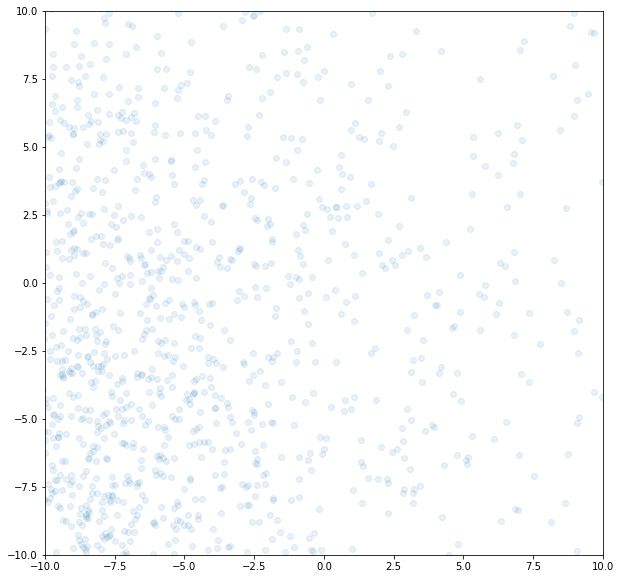

In [21]:
import matplotlib.pyplot as plt

# Plot the PCA
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.1)
plt.xlim([-10, 10])
plt.ylim([-10, 10])

Do PCA on genre by movie to check if there's clusters on single persons

In [22]:
def plot_user_genre_combinations_ratings(user_id, ratings_df, movies_genres_df):
    """
    Create histogram subplots of user ratings by genre.
    
    Parameters:
    -----------
    user_id : int
        The ID of the user to analyze
    ratings_df : pandas.DataFrame
        DataFrame containing columns: user_id, movie_id, rating
    movies_genres_df : pandas.DataFrame
        DataFrame containing columns: movie_id, genres (pipe-separated string)
    """
    # Filter ratings for the specific user
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    
    # Merge with movies_genres to get genre information
    user_ratings_with_genres = user_ratings.merge(movies_genres_df, on='movieId')
    
    # Split the genres and explode to create separate rows for each genre
    #user_ratings_with_genres['genres'] = user_ratings_with_genres['genres'].str.split('|')
    #user_ratings_with_genres = user_ratings_with_genres.explode('genres')
    
    # Get unique genres and set threshold for counts
# Use value_counts() to get unique genres and their counts
    counts = user_ratings_with_genres['genres'].value_counts()
    unique_genres = counts.index  # The unique genre names
    genre_counts = counts.values  # The counts for each genre
    # Calculate number of subplots needed
    n_genres = len(genre_counts[genre_counts>9])
    n_cols = 3
    n_rows = (n_genres + n_cols - 1) // n_cols
    
    # Create figure and subplots
    fig = plt.figure(figsize=(16, 5 * n_rows))
    fig.suptitle(f'Rating Distribution by Genre for User {user_id}', fontsize=16, y=1.02)
    
    # Create a subplot for each genre
    for idx, genre in enumerate(unique_genres, 1):
        if genre_counts[idx]>9 :
            genre_ratings = user_ratings_with_genres[user_ratings_with_genres['genres'] == genre]['rating']
            
            plt.subplot(n_rows, n_cols, idx)
            # Create histogram with centered bars
            plt.hist(genre_ratings, bins=np.arange(0.25, 5.75, 0.5), align='mid', 
                    rwidth=0.8, color='skyblue', edgecolor='black')
                    
            plt.title(f'{genre}\n(n={len(genre_ratings)} ratings)')
            plt.xlabel('Rating')
            plt.ylabel('Count')
    
    plt.tight_layout()
    return fig

IndexError: index 766 is out of bounds for axis 0 with size 766

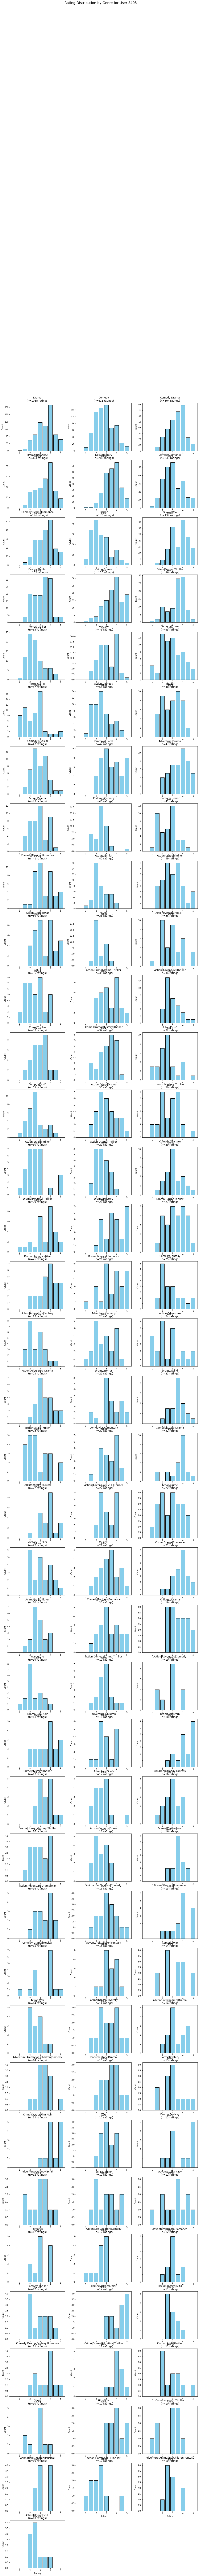

In [23]:
fig1 = plot_user_genre_combinations_ratings(8405, df, movies)
plt.show()

Look at the span of rating for a Movie to check distribution

In [24]:


def plot_ratings_per_movie(movie_id, ratings_df):
    """
    Create a histogram of user ratings for a specific movie.
    
    Parameters:
    -----------
    movie_id : int
        The ID of the movie to analyze.
    ratings_df : pandas.DataFrame
        DataFrame containing columns: movie_id, rating.
    """
    # Filter ratings for the specific movie
    movie_ratings = ratings_df[ratings_df['movieId'] == movie_id]

    # Extract the ratings for the specific movie
    ratings = movie_ratings['rating']

    # Create figure
    fig = plt.figure(figsize=(8, 5))
    fig.suptitle(f'Rating Distribution for Movie ID {movie_id}', fontsize=16)

    # Create histogram with centered bars
    plt.hist(ratings, bins=np.arange(0.25, 5.75, 0.5), align='mid', 
             rwidth=0.8, color='skyblue', edgecolor='black')
    
    # Set labels
    plt.xlabel('Rating')
    plt.ylabel('Count')

    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    return fig


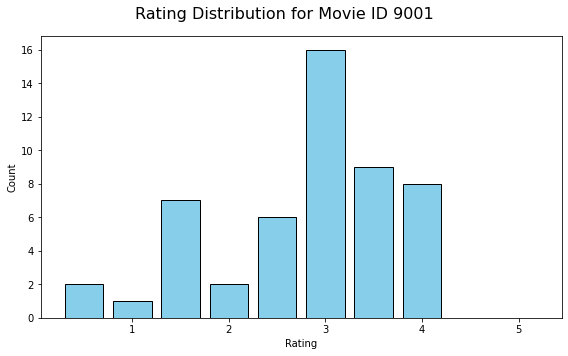

In [25]:
fig2 = plot_ratings_per_movie(9001, df)
plt.show()

Data exploring

In [ ]:
# Summary statistics for ratings
print(df['rating'].describe())

# Distribution of ratings (e.g., counts per rating value)
print(df['rating'].value_counts())


count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64


Statistic per genres

In [74]:
# Split genres if necessary and create a row per genre per movie
movie=movies.copy()
movie['genres'] = movie['genres'].str.split('|')
movies_exploded = movie.explode('genres')

# Merge the exploded genres with the ratings
merged_df = pd.merge(df, movies_exploded, on='movieId')
unique_genres=merged_df['genres']
"""
for genre in unique_genres :
    filtered_merged=merged_df[merged_df['genres']==genre]
    print(" Statistics for : "+str(genre))
    print(filtered_merged['rating'].describe())
    print()
"""

 Statistics for : Adventure
count    4.380351e+06
mean     3.501893e+00
std      1.051605e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

 Statistics for : Children
count    1.669249e+06
mean     3.408114e+00
std      1.087595e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

 Statistics for : Fantasy
count    2.111403e+06
mean     3.505945e+00
std      1.066333e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

 Statistics for : Adventure
count    4.380351e+06
mean     3.501893e+00
std      1.051605e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

 Statistics for : Children
count    1.669249e+06
mean     3.408114e

KeyboardInterrupt: 

Preprocessing Rating Matrix

In [ ]:
ratings_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,131231,131239,131241,131243,131248,131250,131252,131254,131256,131258
userId,,,,,,,,,,,,,,,,,,,,,
116,3.0,2.0,2.0,NaN,NaN,1.5,NaN,1.0,1.5,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,5.0,5.0,2.0,3.0,3.0,4.0,4.0,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,4.0,3.0,3.0,NaN,3.0,5.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138162,4.0,3.0,NaN,NaN,4.0,4.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138208,3.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138254,4.0,3.5,2.0,NaN,NaN,4.5,3.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
Na_Matrix=ratings_matrix.isna()
sorted_NA_columns = Na_Matrix.mean().sort_values()
sorted_NA_columns= Na_Matrix.mean().sort_values().head(10).index
SubRating_matrix=ratings_matrix[sorted_NA_columns]



In [27]:
def Sub_matrix_rating_and_heatmap(ratings_matrix, size):

    # Select columns with the least NA values
    na_columns = ratings_matrix.isna().mean() 
    sorted_na_columns = na_columns.sort_values().head(size).index  
    sub_rating_matrix = ratings_matrix[sorted_na_columns]  
    
    # Select rows with the least NA values
    na_rows = sub_rating_matrix.isna().mean(axis=1) 
    sorted_na_rows = na_rows.sort_values().head(size).index 
    final_sub_matrix = sub_rating_matrix.loc[sorted_na_rows] 
    
    # Plot heatmap
    fig = plt.figure(figsize=(8, 6)) 
    sns.heatmap(final_sub_matrix, annot=False, cmap='coolwarm', linewidths=0.5,xticklabels=False, yticklabels=False)
    plt.title("Heatmap for Rating Matrix per Film")
    plt.xlabel("MovieID")
    plt.ylabel("UserID")
    plt.show()  
    
    return fig, final_sub_matrix
    

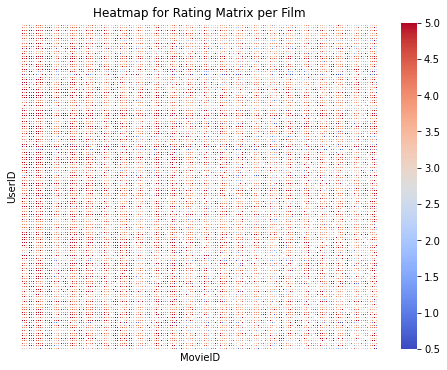

In [31]:
fig2,sub = Sub_matrix_rating_and_heatmap(ratings_matrix, 200)
plt.show()

/Users/alexanderaujesky/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/alexanderaujesky/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


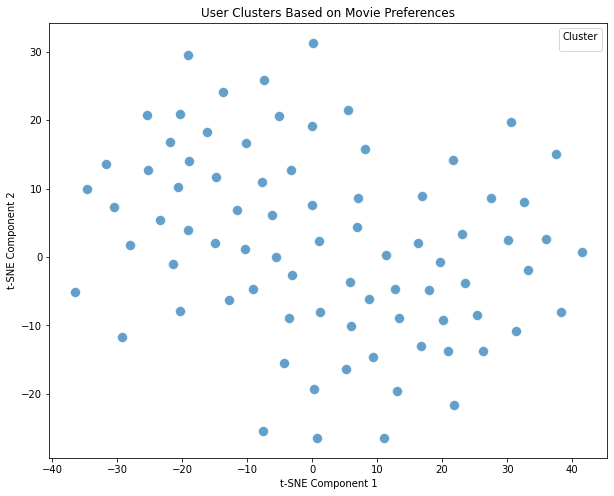

In [30]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KNN Imputation to fill missing values in sub matrix
knn_imputer = KNNImputer(n_neighbors=5)
sub_imputed = knn_imputer.fit_transform(sub)

# Convert the imputed result back to a DataFrame
sub_imputed = pd.DataFrame(sub_imputed, columns=sub.columns)

# Normalize the data (important for t-SNE)
scaler = StandardScaler()
sub_scaled = scaler.fit_transform(sub_imputed.T)  # Scale across users (transpose to scale by user)

# Apply t-SNE to reduce dimensions to 2D for visualization
t_sne = TSNE(n_components=2, perplexity=30, n_iter=300)
sub_tsne = t_sne.fit_transform(sub_scaled)

# Plot the results using t-SNE coordinates
plt.figure(figsize=(10, 8))
sns.scatterplot(x=sub_tsne[:, 0], y=sub_tsne[:, 1], palette="viridis", s=100, alpha=0.7)
plt.title('User Clusters Based on Movie Preferences')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()
